Best tour length: 985.68


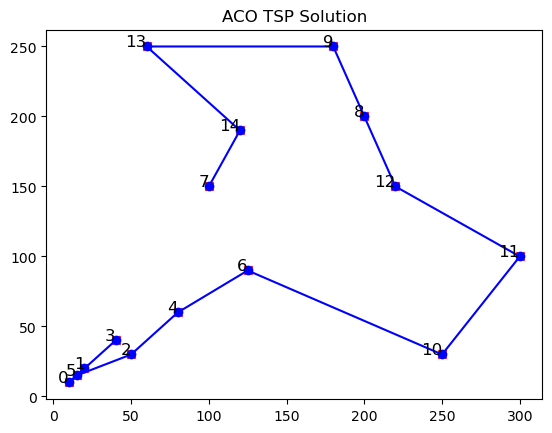

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt

NUM_ANTS = 50
ALPHA = 1.0
BETA = 2.0
RHO = 0.1
Q = 100
MAX_ITER = 100

def define_cities():
    return np.array([
        [10, 10],
        [20, 20],
        [50, 30],
        [40, 40],
        [80, 60],
        [15, 15],
        [125, 90],
        [100, 150],
        [200, 200],
        [180, 250],
        [250, 30],
        [300, 100],
        [220, 150],
        [60, 250],
        [120, 190],
    ])

def compute_distance_matrix(cities):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            dist = np.linalg.norm(cities[i] - cities[j])
            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist
    return distance_matrix

def initialize_pheromone_matrix(num_cities):
    pheromone_matrix = np.ones((num_cities, num_cities))
    np.fill_diagonal(pheromone_matrix, 0)
    return pheromone_matrix

def calculate_tour_length(tour, dist_matrix):
    length = 0
    for i in range(len(tour) - 1):
        length += dist_matrix[tour[i], tour[i + 1]]
    length += dist_matrix[tour[-1], tour[0]]
    return length

def construct_solution(num_cities, pheromone_matrix, dist_matrix):
    tour = [random.randint(0, num_cities - 1)]
    visited = set(tour)
    while len(tour) < num_cities:
        current_city = tour[-1]
        probabilities = []
        for next_city in range(num_cities):
            if next_city not in visited:
                pheromone = pheromone_matrix[current_city, next_city] ** ALPHA
                distance = (1.0 / dist_matrix[current_city, next_city]) ** BETA
                probabilities.append(pheromone * distance)
            else:
                probabilities.append(0)
        total_prob = sum(probabilities)
        probabilities = [p / total_prob for p in probabilities]
        next_city = np.random.choice(range(num_cities), p=probabilities)
        tour.append(next_city)
        visited.add(next_city)
    return tour

def update_pheromone(pheromone_matrix, all_tours, dist_matrix, best_tour):
    pheromone_matrix *= (1 - RHO)
    for tour in all_tours:
        tour_length = calculate_tour_length(tour, dist_matrix)
        for i in range(len(tour) - 1):
            pheromone_matrix[tour[i], tour[i + 1]] += Q / tour_length
        pheromone_matrix[tour[-1], tour[0]] += Q / calculate_tour_length(tour, dist_matrix)
    best_length = calculate_tour_length(best_tour, dist_matrix)
    for i in range(len(best_tour) - 1):
        pheromone_matrix[best_tour[i], best_tour[i + 1]] += Q / best_length
    pheromone_matrix[best_tour[-1], best_tour[0]] += Q / best_length

def ant_colony_optimization(cities, dist_matrix, pheromone_matrix, max_iter):
    best_tour = None
    best_tour_length = float('inf')
    for iteration in range(max_iter):
        all_tours = []
        for _ in range(NUM_ANTS):
            tour = construct_solution(len(cities), pheromone_matrix, dist_matrix)
            all_tours.append(tour)
            tour_length = calculate_tour_length(tour, dist_matrix)
            if tour_length < best_tour_length:
                best_tour = tour
                best_tour_length = tour_length
        update_pheromone(pheromone_matrix, all_tours, dist_matrix, best_tour)
    return best_tour, best_tour_length

def plot_tour(cities, best_tour):
    tour_cities = cities[best_tour]
    plt.plot(tour_cities[:, 0], tour_cities[:, 1], 'bo-', markersize=6)
    plt.scatter(cities[:, 0], cities[:, 1], color='red', marker='x')
    for i, city in enumerate(cities):
        plt.text(city[0], city[1], f'{i}', fontsize=12, ha='right')
    plt.title("ACO TSP Solution")
    plt.show()

if __name__ == "__main__":
    cities = define_cities()
    dist_matrix = compute_distance_matrix(cities)
    pheromone_matrix = initialize_pheromone_matrix(len(cities))
    best_tour, best_tour_length = ant_colony_optimization(cities, dist_matrix, pheromone_matrix, MAX_ITER)
    print(f"Best tour length: {best_tour_length:.2f}")
    plot_tour(cities, best_tour)
